## 3.5. Naive Bayes

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
train_data = pd.read_csv('final_train_data_StdSc.csv')
test_data = pd.read_csv('final_test_data_StdSc.csv')
train_data.head()
test_data.head()

,Unnamed: 0,bd,num_25_sum,num_50_sum,num_75_sum,num_985_sum,num_100_sum,num_unq_sum,num_totalsec_sum,num_25_mean,...,gender_0,gender_1,gender_2,registered_via_3,registered_via_4,registered_via_7,registered_via_9,registered_via_13,msno,is_churn
0,120957,-0.840527,-0.522259,-0.602739,-0.584220,-0.377952,-0.114536,-0.192430,-0.146375,-0.703467,...,-0.524053,-0.556615,0.908187,2.711588,-0.243489,-1.105817,-0.608882,-0.061113,fAbsh3kAffPa/1ZZZbo2ItlNou9tn22EMRTvF4clEak=,0
1,289553,0.792488,-0.581050,-0.640079,-0.575303,-0.433727,-0.338979,-0.497846,-0.337333,-0.665328,...,1.908205,-0.556615,-1.101094,-0.368788,-0.243489,-1.105817,1.642354,-0.061113,3RQH2OV7U01TisVNUqxgylb7is8BaFQUnozvU8AaWhA=,0
2,525621,-0.840527,2.572062,0.634802,1.011987,0.525592,1.136128,1.511263,1.035867,1.827277,...,-0.524053,-0.556615,0.908187,-0.368788,-0.243489,0.904309,-0.608882,-0.061113,9iEb9xcrVceAYOst3Su+Edkqfrx3RTZE1lgpROT9wX4=,0
3,383252,1.106529,-0.337487,-0.261348,-0.236443,-0.271981,-0.261964,-0.285715,-0.268519,-0.503196,...,-0.524053,1.796573,-1.101094,-0.368788,-0.243489,0.904309,-0.608882,-0.061113,FxLIZcN3AYC1LYvWCG0hNGkcfmnP9MwGUxRxAXY3r5M=,0
4,274462,1.671803,-0.207907,-0.111990,-0.067013,0.034778,-0.332928,-0.290694,-0.320169,-0.297483,...,-0.524053,1.796573,-1.101094,2.711588,-0.243489,-1.105817,-0.608882,-0.061113,dz5+eXZINBe7apJ8K7v4S+zzDi3o7tAeLMWAnrcIc54=,0


In [2]:
#reduce features
#model 1 (all the features from the feature selection)
train_data_new_total=train_data[['number_of_days_201702_listened','is_auto_renew','total_cancel','active_days','avg_actual_amount_paid','most_fq_payment_method_id','num_75_mean','number_of_days_listened','num_25_201702_sum','num_50_201702_sum','num_100_201702_sum','num_25_201702_mean','num_50_201702_mean','num_totalsec_lasttwo_mean','total_churn','registered_via_3','registered_via_4','registered_via_7','bd','num_totalsec_sum','num_100_med','num_25_max','num_unq_max','num_totalsec_max','num_totalsec_min','num_985_201702_sum','num_75_201702_mean','num_unq_201702_mean','num_unq_201701_sum','num_25_201612_mean','num_100_201612_mean','num_75_lasttwo_mean','num_50_lastthree_mean','proportion_songs_above_50','registered_via_9']]
test_data_new_total=test_data[['number_of_days_201702_listened','is_auto_renew','total_cancel','active_days','avg_actual_amount_paid','most_fq_payment_method_id','num_75_mean','number_of_days_listened','num_25_201702_sum','num_50_201702_sum','num_100_201702_sum','num_25_201702_mean','num_50_201702_mean','num_totalsec_lasttwo_mean','total_churn','registered_via_3','registered_via_4','registered_via_7','bd','num_totalsec_sum','num_100_med','num_25_max','num_unq_max','num_totalsec_max','num_totalsec_min','num_985_201702_sum','num_75_201702_mean','num_unq_201702_mean','num_unq_201701_sum','num_25_201612_mean','num_100_201612_mean','num_75_lasttwo_mean','num_50_lastthree_mean','proportion_songs_above_50','registered_via_9']]

# model 2 (4 ranked features)
train_data_new_ranked4=train_data[['number_of_days_201702_listened','is_auto_renew','total_cancel','active_days','avg_actual_amount_paid']]
test_data_new_ranked4=test_data[['number_of_days_201702_listened','is_auto_renew','total_cancel','active_days','avg_actual_amount_paid']]

# model 3 (4 and 3 ranked features)
train_data_new_ranked43=train_data[['number_of_days_201702_listened','is_auto_renew','total_cancel','active_days','avg_actual_amount_paid','most_fq_payment_method_id']]
test_data_new_ranked43=test_data[['number_of_days_201702_listened','is_auto_renew','total_cancel','active_days','avg_actual_amount_paid','most_fq_payment_method_id']]

# model 4 (4, 3, 2 ranked features)
train_data_new_ranked432=train_data[['number_of_days_201702_listened','is_auto_renew','total_cancel','active_days','avg_actual_amount_paid','most_fq_payment_method_id','num_75_mean','number_of_days_listened','num_25_201702_sum','num_50_201702_sum','num_100_201702_sum','num_25_201702_mean','num_50_201702_mean','num_totalsec_lasttwo_mean','total_churn','registered_via_3','registered_via_4','registered_via_7']]
test_data_new_ranked432=test_data[['number_of_days_201702_listened','is_auto_renew','total_cancel','active_days','avg_actual_amount_paid','most_fq_payment_method_id','num_75_mean','number_of_days_listened','num_25_201702_sum','num_50_201702_sum','num_100_201702_sum','num_25_201702_mean','num_50_201702_mean','num_totalsec_lasttwo_mean','total_churn','registered_via_3','registered_via_4','registered_via_7']]

# model 5 (ranked 1,2)
train_data_new_ranked21=train_data[['num_75_mean','number_of_days_listened','num_25_201702_sum','num_50_201702_sum','num_100_201702_sum','num_25_201702_mean','num_50_201702_mean','num_totalsec_lasttwo_mean','total_churn','registered_via_3','registered_via_4','registered_via_7','bd','num_totalsec_sum','num_100_med','num_25_max','num_unq_max','num_totalsec_max','num_totalsec_min','num_985_201702_sum','num_75_201702_mean','num_unq_201702_mean','num_unq_201701_sum','num_25_201612_mean','num_100_201612_mean','num_75_lasttwo_mean','num_50_lastthree_mean','proportion_songs_above_50','registered_via_9']]
test_data_new_ranked21=test_data[['num_75_mean','number_of_days_listened','num_25_201702_sum','num_50_201702_sum','num_100_201702_sum','num_25_201702_mean','num_50_201702_mean','num_totalsec_lasttwo_mean','total_churn','registered_via_3','registered_via_4','registered_via_7','bd','num_totalsec_sum','num_100_med','num_25_max','num_unq_max','num_totalsec_max','num_totalsec_min','num_985_201702_sum','num_75_201702_mean','num_unq_201702_mean','num_unq_201701_sum','num_25_201612_mean','num_100_201612_mean','num_75_lasttwo_mean','num_50_lastthree_mean','proportion_songs_above_50','registered_via_9']]

train_target_data=train_data['is_churn']
test_target_data=test_data['is_churn']


### 3.5.1 model 1

In [3]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
clf = GaussianNB()
clf.fit(train_data_new_total,train_target_data)
y_score_total = clf.predict_proba(test_data_new_total)
y_score_total=y_score_total[:,1]#probability estimates of the positive class(is_churn)
average_precision_total = average_precision_score(test_target_data, y_score_total)
auc_score_total =roc_auc_score(test_target_data, y_score_total)
logloss_total=log_loss(test_target_data, y_score_total)
print('AP={0:0.2f}'.format(average_precision_total))
print('AUC={0:0.2f}'.format(auc_score_total))
print('Logloss={0:0.2f}'.format(logloss_total))
print(classification_report(test_target_data, clf.predict(test_data_new_total)))


AP=0.40
AUC=0.88
Logloss=1.13
             precision    recall  f1-score   support

          0       0.99      0.78      0.87    245550
          1       0.22      0.88      0.35     17293

avg / total       0.94      0.78      0.84    262843



### 3.5.2. model 2

In [4]:
from sklearn.metrics import confusion_matrix
clf = GaussianNB()
clf.fit(train_data_new_ranked4,train_target_data)
y_score_ranked4 = clf.predict_proba(test_data_new_ranked4)
y_score_ranked4=y_score_ranked4[:,1]

average_precision_ranked4 = average_precision_score(test_target_data, y_score_ranked4)
auc_score_ranked4 =roc_auc_score(test_target_data, y_score_ranked4)
logloss_ranked4=log_loss(test_target_data, y_score_ranked4)
print('AP={0:0.2f}'.format(average_precision_ranked4))
print('AUC={0:0.2f}'.format(auc_score_ranked4))
print('Logloss={0:0.2f}'.format(logloss_ranked4))
print(classification_report(test_target_data, clf.predict(test_data_new_ranked4)))
confusion_matrix(test_target_data, clf.predict(test_data_new_ranked4))

AP=0.46
AUC=0.94
Logloss=0.63
             precision    recall  f1-score   support

          0       1.00      0.82      0.90    245550
          1       0.27      0.97      0.43     17293

avg / total       0.95      0.83      0.87    262843



array([[201091,  44459],
       [   556,  16737]], dtype=int64)

### 3.5.3. model 3

In [5]:
clf = GaussianNB()
clf.fit(train_data_new_ranked43,train_target_data)
y_score_ranked43 = clf.predict_proba(test_data_new_ranked43)
y_score_ranked43=y_score_ranked43[:,1]
average_precision_ranked43 = average_precision_score(test_target_data, y_score_ranked43)
auc_score_ranked43 =roc_auc_score(test_target_data, y_score_ranked43)
logloss_ranked43=log_loss(test_target_data, y_score_ranked43)
print('AP={0:0.2f}'.format(average_precision_ranked43))
print('AUC={0:0.2f}'.format(auc_score_ranked43))
print('Logloss={0:0.2f}'.format(logloss_ranked43))
print(classification_report(test_target_data, clf.predict(test_data_new_ranked43)))

AP=0.44
AUC=0.94
Logloss=0.65
             precision    recall  f1-score   support

          0       1.00      0.82      0.90    245550
          1       0.27      0.97      0.43     17293

avg / total       0.95      0.83      0.87    262843



### 3.5.4. model 4

In [6]:
clf = GaussianNB()
clf.fit(train_data_new_ranked432,train_target_data)
y_score_ranked432 = clf.predict_proba(test_data_new_ranked432)
y_score_ranked432=y_score_ranked432[:,1]
average_precision_ranked432 = average_precision_score(test_target_data, y_score_ranked432)
auc_score_ranked432=roc_auc_score(test_target_data, y_score_ranked432)
logloss_ranked432=log_loss(test_target_data, y_score_ranked432)
print('AP={0:0.2f}'.format(average_precision_ranked432))
print('AUC={0:0.2f}'.format(auc_score_ranked432))
print('Logloss={0:0.2f}'.format(logloss_ranked432))
print(classification_report(test_target_data, clf.predict(test_data_new_ranked432)))

AP=0.40
AUC=0.91
Logloss=0.91
             precision    recall  f1-score   support

          0       0.99      0.83      0.90    245550
          1       0.27      0.89      0.41     17293

avg / total       0.94      0.83      0.87    262843



### 3.5.5. model 5

In [9]:
clf = GaussianNB()
clf.fit(train_data_new_ranked21,train_target_data)
y_score_ranked21 = clf.predict_proba(test_data_new_ranked21)
y_score_ranked21=y_score_ranked21[:,1]
average_precision_ranked21 = average_precision_score(test_target_data, y_score_ranked21)
auc_score_ranked21=roc_auc_score(test_target_data, y_score_ranked21)
logloss_ranked21=log_loss(test_target_data, y_score_ranked21)
print('AP={0:0.2f}'.format(average_precision_ranked21))
print('AUC={0:0.2f}'.format(auc_score_ranked21))
print('Logloss={0:0.2f}'.format(logloss_ranked21))
print(classification_report(test_target_data, clf.predict(test_data_new_ranked21)))

AP=0.18
AUC=0.72
Logloss=1.42
             precision    recall  f1-score   support

          0       0.97      0.48      0.64    245550
          1       0.10      0.79      0.17     17293

avg / total       0.91      0.50      0.61    262843



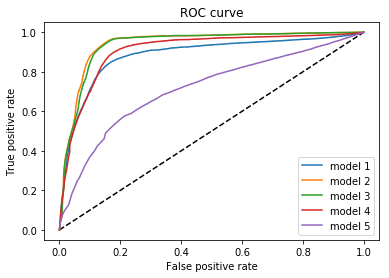

In [12]:
#ROC curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr_rf_total, tpr_rf_total, _ = roc_curve(test_target_data, y_score_total)
fpr_rf_ranked4, tpr_rf_ranked4, _ = roc_curve(test_target_data, y_score_ranked4)
fpr_rf_ranked43, tpr_rf_ranked43, _ = roc_curve(test_target_data, y_score_ranked43)
fpr_rf_ranked432, tpr_rf_ranked432, _ = roc_curve(test_target_data, y_score_ranked432)
fpr_rf_ranked21, tpr_rf_ranked21, _ = roc_curve(test_target_data, y_score_ranked21)

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_rf_total, tpr_rf_total, label='model 1')
plt.plot(fpr_rf_ranked4, tpr_rf_ranked4, label='model 2')
plt.plot(fpr_rf_ranked43, tpr_rf_ranked43, label='model 3')
plt.plot(fpr_rf_ranked432, tpr_rf_ranked432, label='model 4')
plt.plot(fpr_rf_ranked21, tpr_rf_ranked21, label='model 5')
plt.legend(loc='best')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()